In [1]:
# Support Vector Machine

# Importing the libraries
import json # will be needed for saving preprocessing details
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('Data_without-72ROWS.csv')
array = df.values
print('Shape:', df.shape)
# set input matrix and target column
X = array[:, :-1]
y = array[:, 6]
# show first row of data
print(df.head())
print(df.describe())

Shape: (454, 7)
   Floor_Num  Total_Floor_Area  Column_Area  Masonry_Wall_AreaNS  \
0        2.0              1797         6.21                 0.00   
1        1.0               577         2.00                 0.00   
2        3.0               498         1.50                 1.35   
3        2.0               310         1.40                 1.02   
4        3.0               287         0.74                 3.74   

   Masonry_Wall_AreaEW  Captive_Columns Damage_Class  
0                 9.49                1       Severe  
1                 1.68                0        Light  
2                 0.40                0        Light  
3                 0.00                0        Light  
4                 1.74                1       Severe  
        Floor_Num  Total_Floor_Area  Column_Area  Masonry_Wall_AreaNS  \
count  454.000000        454.000000   454.000000           454.000000   
mean     3.061674        608.255507     1.956145             3.100198   
std      1.344413        5

In [3]:
# data split train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=1234)

In [4]:
# taking care of the missing data
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose = 0)
imputer = imputer.fit(X[:, 1:6]) #upper bound is not included, but lower bound
X[:, 1:6] = imputer.transform(X[:, 1:6])

In [5]:
# encoding the dependent variable
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [6]:
# rescale data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [7]:
# summarize the class distribution
target = df.values[:, -1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%s, Percentage=%.3f%%' % (k, v, per))

Class=Severe, Count=194, Percentage=42.731%
Class=Light, Count=138, Percentage=30.396%
Class=Moderate, Count=76, Percentage=16.740%
Class=None, Count=46, Percentage=10.132%


In [8]:
# Re-summarize class distribution
print(X.shape, y.shape,Counter(y))

(454, 6) (454,) Counter({3: 194, 0: 138, 1: 76, 2: 46})


In [9]:
# Implementing SMOTE for the Imbalanced data in Multi-class classification
smote=SMOTE("minority")
X,y=smote.fit_resample(X,y)

/home/vandana/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [10]:
print(X.shape, y.shape, Counter(y))

(602, 6) (602,) Counter({3: 194, 2: 194, 0: 138, 1: 76})


In [11]:
# To balance another minority class
smote=SMOTE("minority")
X,y=smote.fit_resample(X,y)

/home/vandana/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [12]:
# Re-summarize class distribution
print(X.shape, y.shape,Counter(y))

(720, 6) (720,) Counter({3: 194, 1: 194, 2: 194, 0: 138})


In [13]:
# To balance another minority class
smote=SMOTE("minority")
X,y=smote.fit_resample(X,y)

/home/vandana/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [14]:
# Re-summarize class distribution
print(X.shape, y.shape,Counter(y))

(776, 6) (776,) Counter({3: 194, 0: 194, 1: 194, 2: 194})


In [15]:
# Feature Scaling - 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

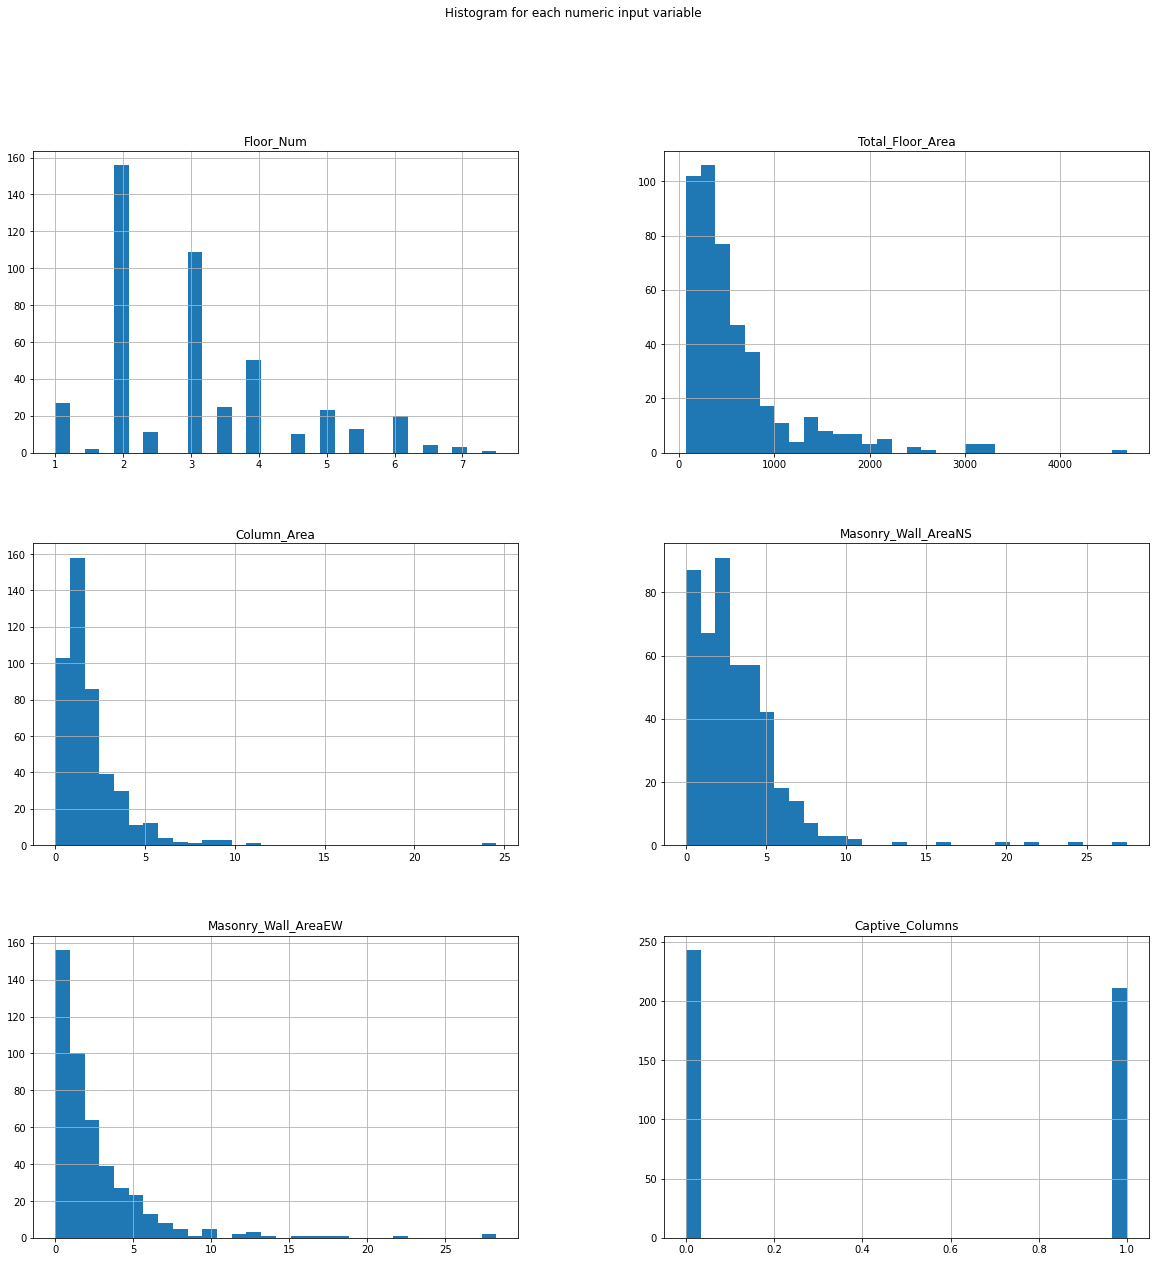

In [16]:
# Histogram plot
df.drop('Damage_Class',axis=1).hist(bins=30, figsize=(10,10))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('Damage_hist')
plt.show()

In [17]:
#Apply kernel to transform the data to a higher dimension
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")


    #Train a model - 
    #Call the SVC() model from sklearn and fit the model to the training data
    for i in range(4):
    # Separate data into test and training sets
        from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size = 0.20)

    # Train a SVC model using different kernal
    classifier = getClassifier(i) 
    classifier.fit(X_train, y_train)

    # Make prediction
    y_pred = classifier.predict(X_test)


    # Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))


In [18]:
#Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma
#Tuning the hyper-parameters of an estimator
    #GridSearchCV helps us combine an estimator with a grid search preamble to tune hyper-parameters.
#Import GridsearchCV from Scikit Learn
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [19]:
#Create a GridSearchCV object and fit it to the training data
from sklearn.svm import SVC  
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)    


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [20]:
#Find the optimal parameters
print(grid.best_estimator_)

SVC(C=1, gamma=0.1)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix 
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[20  0  0 17]
 [ 7  0  0 10]
 [ 1  0  0  8]
 [10  0  0 41]]
              precision    recall  f1-score   support

       Light       0.53      0.54      0.53        37
    Moderate       0.00      0.00      0.00        17
        None       0.00      0.00      0.00         9
      Severe       0.54      0.80      0.65        51

    accuracy                           0.54       114
   macro avg       0.27      0.34      0.29       114
weighted avg       0.41      0.54      0.46       114

/home/vandana/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vandana/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels 